In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets
import opt_utils
import testCase
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearnest'
plt.rcParams['image.cmap'] = 'gray'

D:\jupyter_file\deep_learning_exercise\课程2 改善神经网络\课程2-第二周作业-优化算法\opt_utils.py:76: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
D:\jupyter_file\deep_learning_exercise\课程2 改善神经网络\课程2-第二周作业-优化算法\opt_utils.py:77: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], 1)


In [2]:
def update_parameters_with_gd(parameters, grads, learning_rate):
    num_layers = len(parameters) // 2
    for i in range(num_layers):
        parameters["W" + str(i + 1)] = parameters["W" + str(i + 1)] - learning_rate * grads["dW" + str(i + 1)]
        parameters["b" + str(i + 1)] = parameters["b" + str(i + 1)] - learning_rate * grads["db" + str(i + 1)]
    
    return parameters
        

In [3]:
# #测试update_parameters_with_gd
# print("-------------测试update_parameters_with_gd-------------")
# parameters , grads , learning_rate = testCase.update_parameters_with_gd_test_case()
# parameters = update_parameters_with_gd(parameters,grads,learning_rate)
# print("W1 = " + str(parameters["W1"]))
# print("b1 = " + str(parameters["b1"]))
# print("W2 = " + str(parameters["W2"]))
# print("b2 = " + str(parameters["b2"]))

In [4]:
def random_mini_batches(X, Y, mini_batches_size = 64, seed = 0):
    np.random.seed(seed)
    mini_batches = []
    m = X.shape[1]
    
    permutation = list(np.random.permutation(m))  # 把0到m-1的自然数打乱，放入list
    X = X[:, permutation] # 列按照打乱来重新排
    Y = Y[:, permutation]
    
    num_batch = math.floor(m / mini_batches_size)
    for i in range(num_batch):
        # 取第i + 1个batch
        X_batch_i = X[:, i * mini_batches_size:(i + 1) * mini_batches_size]
        Y_batch_i = Y[:, i * mini_batches_size:(i + 1) * mini_batches_size]
        # 把第i + 1个batch放到列表里
        mini_batches.append((X_batch_i, Y_batch_i))
        
    if m % mini_batches_size != 0:
        X_batch_last = X[:, num_batch * mini_batches_size:]
        Y_batch_last = Y[:, num_batch * mini_batches_size:]
        
        mini_batches.append((X_batch_last, Y_batch_last))  
    
    return mini_batches

In [5]:
# #测试random_mini_batches
# print("-------------测试random_mini_batches-------------")
# X_assess,Y_assess,mini_batch_size = testCase.random_mini_batches_test_case()
# mini_batches = random_mini_batches(X_assess,Y_assess,mini_batch_size)

# print("第1个mini_batch_X 的维度为：",mini_batches[0][0].shape)
# print("第1个mini_batch_Y 的维度为：",mini_batches[0][1].shape)
# print("第2个mini_batch_X 的维度为：",mini_batches[1][0].shape)
# print("第2个mini_batch_Y 的维度为：",mini_batches[1][1].shape)
# print("第3个mini_batch_X 的维度为：",mini_batches[2][0].shape)
# print("第3个mini_batch_Y 的维度为：",mini_batches[2][1].shape)

In [6]:
def initialize_velocity(parameters):
    num_layers = len(parameters) // 2
    v = {}
    for i in range(num_layers):
        v["dW" + str(i + 1)] = np.zeros_like(parameters["W" + str(i + 1)])
        v["db" + str(i + 1)] = np.zeros_like(parameters["b" + str(i + 1)])
    
    return v

In [7]:
# #测试initialize_velocity
# print("-------------测试initialize_velocity-------------")
# parameters = testCase.initialize_velocity_test_case()
# v = initialize_velocity(parameters)

# print('v["dW1"] = ' + str(v["dW1"]))
# print('v["db1"] = ' + str(v["db1"]))
# print('v["dW2"] = ' + str(v["dW2"]))
# print('v["db2"] = ' + str(v["db2"]))

In [8]:
def update_parameters_with_momentun(parameters,grads,v,beta,learning_rate):
    """
    更新一次每层参数，用动量梯度下降
    调用次函数j次，就更新参数j次，v其实是另一种梯度下降方向，普通下降方向的就是当前参数W的梯度，现在是考虑了之前所有的梯度不仅仅是当前的
    """
    num_layers = len(parameters)//2
    for i in range(num_layers):
        # 更新一次第i + 1层动量及其参数
        v["dW" + str(i + 1)] = beta * v["dW" + str(i + 1)] + (1 - beta) * grads["dW" + str(i + 1)]
        v["db" + str(i + 1)] = beta * v["db" + str(i + 1)] + (1 - beta) * grads["db" + str(i + 1)]
        parameters["W" + str(i + 1)] = parameters["W" + str(i + 1)] - learning_rate * v["dW" + str(i + 1)]
        parameters["b" + str(i + 1)] = parameters["b" + str(i + 1)] - learning_rate * v["db" + str(i + 1)]
    
    return parameters,v

In [9]:
def initialize_adam(parameters):

    L = len(parameters) // 2
    v = {}
    s = {}

    for l in range(L):
        v["dW" + str(l + 1)] = np.zeros_like(parameters["W" + str(l + 1)])
        v["db" + str(l + 1)] = np.zeros_like(parameters["b" + str(l + 1)])

        s["dW" + str(l + 1)] = np.zeros_like(parameters["W" + str(l + 1)])
        s["db" + str(l + 1)] = np.zeros_like(parameters["b" + str(l + 1)])

    return (v,s)


In [10]:
# #测试initialize_adam
# print("-------------测试initialize_adam-------------")
# parameters = testCase.initialize_adam_test_case()
# v,s = initialize_adam(parameters)

# print('v["dW1"] = ' + str(v["dW1"])) 
# print('v["db1"] = ' + str(v["db1"])) 
# print('v["dW2"] = ' + str(v["dW2"])) 
# print('v["db2"] = ' + str(v["db2"])) 
# print('s["dW1"] = ' + str(s["dW1"])) 
# print('s["db1"] = ' + str(s["db1"])) 
# print('s["dW2"] = ' + str(s["dW2"])) 
# print('s["db2"] = ' + str(s["db2"])) 

In [11]:
def update_parameters_with_adam(parameters,grads,v,s,t,learning_rate=0.01,beta1=0.9,beta2=0.999,epsilon=1e-8):
    num_layers = len(parameters) // 2
    v_corr = {}
    s_corr = {}
    for i in range(num_layers):
        v["dW" + str(i + 1)] = beta1 * v["dW" + str(i + 1)] + (1 - beta1) * grads["dW" + str(i + 1)]
        v["db" + str(i + 1)] = beta1 * v["db" + str(i + 1)] + (1 - beta1) * grads["db" + str(i + 1)]
        
        v_corr["dW" + str(i + 1)] = v["dW" + str(i + 1)] / (1 - np.power(beta1, t))
        v_corr["db" + str(i + 1)] = v["db" + str(i + 1)] / (1 - np.power(beta1, t))
        
        s["dW" + str(i + 1)] = beta2 * s["dW" + str(i + 1)] + (1 - beta2) * np.square(grads["dW" + str(i + 1)])        
        s["db" + str(i + 1)] = beta2 * s["db" + str(i + 1)] + (1 - beta2) * np.square(grads["db" + str(i + 1)])
        
        s_corr["dW" + str(i + 1)] = s["dW" + str(i + 1)] / (1 - np.power(beta2, t))
        s_corr["db" + str(i + 1)] = s["db" + str(i + 1)] / (1 - np.power(beta2, t))
        
        parameters["W" + str(i + 1)] = parameters["W" + str(i + 1)] - learning_rate * v_corr["dW" + str(i + 1)] / (np.sqrt(s_corr["dW" + str(i + 1)] + epsilon))
        parameters["b" + str(i + 1)] = parameters["b" + str(i + 1)] - learning_rate * v_corr["db" + str(i + 1)] / (np.sqrt(s_corr["db" + str(i + 1)] + epsilon))
        
    return parameters, v, s

In [12]:
# #测试update_with_parameters_with_adam
# print("-------------测试update_with_parameters_with_adam-------------")
# parameters , grads , v , s = testCase.update_parameters_with_adam_test_case()
# update_parameters_with_adam(parameters,grads,v,s,t=2)

# print("W1 = " + str(parameters["W1"]))
# print("b1 = " + str(parameters["b1"]))
# print("W2 = " + str(parameters["W2"]))
# print("b2 = " + str(parameters["b2"]))
# print('v["dW1"] = ' + str(v["dW1"])) 
# print('v["db1"] = ' + str(v["db1"])) 
# print('v["dW2"] = ' + str(v["dW2"])) 
# print('v["db2"] = ' + str(v["db2"])) 
# print('s["dW1"] = ' + str(s["dW1"])) 
# print('s["db1"] = ' + str(s["db1"])) 
# print('s["dW2"] = ' + str(s["dW2"])) 
# print('s["db2"] = ' + str(s["db2"])) 

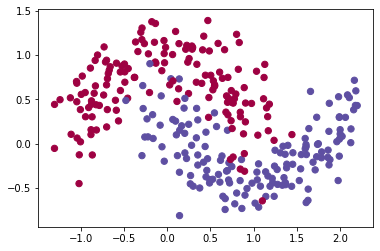

In [13]:
train_X, train_Y = opt_utils.load_dataset(is_plot=True)

总结：优化算法只是在更新参数时不同于最普通的梯度下降法。无论哪种优化算法，都是一样的步骤：
1.前向传播，返回A_output,cache
2.计算loss
3.反向传播，返回梯度dW
4.更新参数，虽然各有千秋，但总归是在原来的参数上减去一个值,普通的值就是梯度，优化算法的值是对梯度进行处理后的值
重复上述动作num_epochs次，迭代完成，返回新的参数

In [14]:
def model(X,Y,layers_dims,optimizer,learning_rate=0.0007,mini_batch_size=64,beta=0.9,beta1=0.9,beta2=0.999,epsilon=1e-8,num_epochs=10000,print_cost=True,is_plot=True):
    parameters = opt_utils.initialize_parameters(layers_dims)
    if optimizer == "gd":
        pass
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    else:
        print("optimizer error,exit")
        exit(1)
    
    seed = 10
    t = 0
    costs =[]
    
    for i in range(num_epochs): # 要对整个数据集进行num_epochs次迭代 
        # 每次迭代，希望数据集都是重新排列，保证每次迭代的小批量数据集不同
        seed = seed + 1
        batches_list = random_mini_batches(X, Y, mini_batch_size, seed)
        
        for mini_batch in batches_list:   #遍历所有小批量数据
            (x_batch, y_batch) = mini_batch # 当前小批量数据集，用这个小批量数据集来更新一次参数
            # 1. 前向传播
            a3, cache = opt_utils.forward_propagation(x_batch, parameters)
            # 2. 计算loss
            loss = opt_utils.compute_cost(a3, y_batch)
            # 3. 反向传播
            grads = opt_utils.backward_propagation(x_batch, y_batch, cache)
            # 4. 更新参数
            
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters,v = update_parameters_with_momentun(parameters,grads,v,beta,learning_rate) # 返回这次迭代用的v，下次要用这次的来更新
            elif optimizer == "adam":
                t = t + 1 # 现在用第t个小批量数据集来更新参数
                parameters, v, s = update_parameters_with_adam(parameters,grads,v,s,t,learning_rate,beta1,beta2,epsilon)
            
        if i % 100 == 0:
            costs.append(loss)
            if print_cost and i % 1000 == 0:
                print("epoch:{}\t|cost:{}".format(i, loss))
    if is_plot:
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('epoch')
        plt.title("learning_rate = " + str(learning_rate))
        plt.show()           
    return parameters
               

epoch:0	|cost:0.690735512291113
epoch:1000	|cost:0.6852725328458241
epoch:2000	|cost:0.6470722240719002
epoch:3000	|cost:0.6195245549970402
epoch:4000	|cost:0.5765844355950943
epoch:5000	|cost:0.6072426395968575
epoch:6000	|cost:0.5294033317684576
epoch:7000	|cost:0.46076823985930115
epoch:8000	|cost:0.465586082399045
epoch:9000	|cost:0.4645179722167684


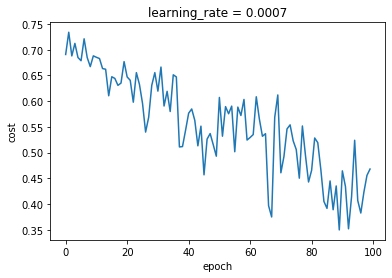

In [19]:
#使用普通的梯度下降
layers_dims = [train_X.shape[0],5,2,1]
parameters = model(train_X, train_Y, layers_dims, optimizer="gd",is_plot=True)


Accuracy: 0.7966666666666666


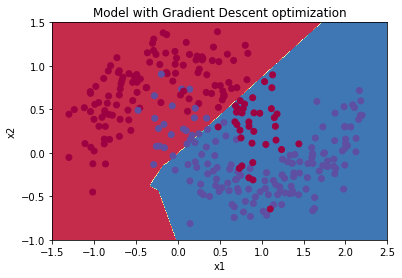

In [20]:
#预测
preditions = opt_utils.predict(train_X,train_Y,parameters)

#绘制分类图
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5, 2.5])
axes.set_ylim([-1, 1.5])
opt_utils.plot_decision_boundary(lambda x: opt_utils.predict_dec(parameters, x.T), train_X, train_Y)

epoch:0	|cost:0.6907412988351506
epoch:1000	|cost:0.6853405261267578
epoch:2000	|cost:0.6471448370095255
epoch:3000	|cost:0.6195943032076022
epoch:4000	|cost:0.5766650344073023
epoch:5000	|cost:0.607323821900647
epoch:6000	|cost:0.5294761758786997
epoch:7000	|cost:0.46093619004872366
epoch:8000	|cost:0.465780093701272
epoch:9000	|cost:0.4647395967922748


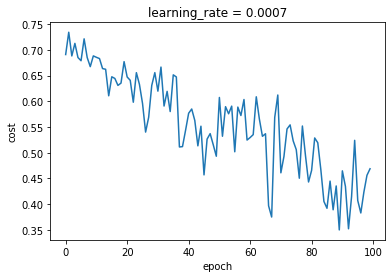

Accuracy: 0.7966666666666666


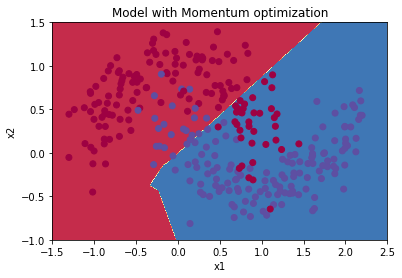

In [23]:
layers_dims = [train_X.shape[0],5,2,1]
#使用动量的梯度下降
parameters = model(train_X, train_Y, layers_dims, beta=0.9,optimizer="momentum",is_plot=True)
#预测
preditions = opt_utils.predict(train_X,train_Y,parameters)

#绘制分类图
plt.title("Model with Momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5, 2.5])
axes.set_ylim([-1, 1.5])
opt_utils.plot_decision_boundary(lambda x: opt_utils.predict_dec(parameters, x.T), train_X, train_Y)


epoch:0	|cost:0.6905522446113365
epoch:1000	|cost:0.18550136438550568
epoch:2000	|cost:0.15083046575253206
epoch:3000	|cost:0.07445438570997179
epoch:4000	|cost:0.1259591565133716
epoch:5000	|cost:0.10434443534245477
epoch:6000	|cost:0.10067637504120648
epoch:7000	|cost:0.03165203013511564
epoch:8000	|cost:0.11197273131244206
epoch:9000	|cost:0.19794007152465484


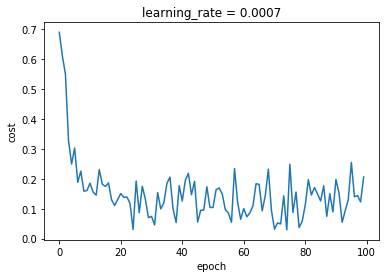

Accuracy: 0.94


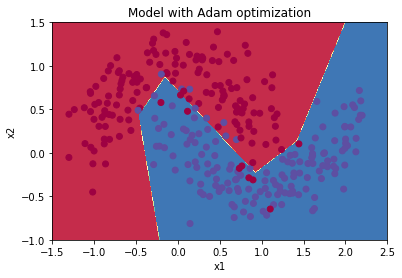

In [24]:
layers_dims = [train_X.shape[0], 5, 2, 1]
#使用Adam优化的梯度下降
parameters = model(train_X, train_Y, layers_dims, optimizer="adam",is_plot=True)
#预测
preditions = opt_utils.predict(train_X,train_Y,parameters)

#绘制分类图
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5, 2.5])
axes.set_ylim([-1, 1.5])
opt_utils.plot_decision_boundary(lambda x: opt_utils.predict_dec(parameters, x.T), train_X, train_Y)